In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/denniss/Downloads/train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Exploration

Columns

In [3]:
# What are those cryptic column names?

# sibsp - number of siblings/spouses aboard
# parch - number of parents/children aboard
# ticket - ticket number
# fare - passenger fare
# cabin - cabin
# embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
# Describe, classify data

# 'Pclass' - ordinal
# 'Name'   - nominal
# 'Sex'    - nominal
# 'Age'    - continuous metric
# 'SibSp'  - discrete metric
# 'Parch'  - discrete metric
# 'Ticket' - nominal
# 'Fare'   - continuous metric
# 'Cabin'  - nominal
# 'Embarked' - nominal

Missing values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [7]:
# Drop 'Cabin' column: too many missing values, too many unique ones
df = df.drop(['Cabin'], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Data with too many unique values

In [8]:
df.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [9]:
df.drop(["Ticket"], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Columns with numerical values only

In [21]:
# Calculate average survival rate / Pclass
df.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


"Age" is a bit difficult to inspect, due to continuous character

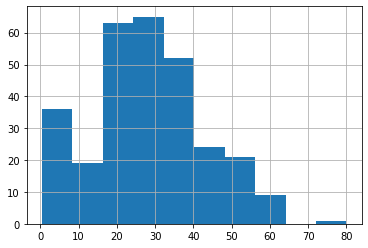

In [11]:
survived = df[df.Survived == 1]
survived["Age"].hist()

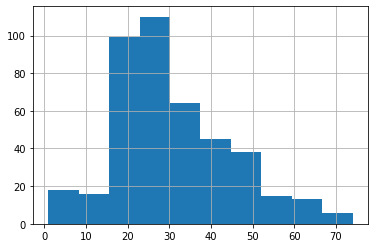

In [12]:
died = df[df.Survived == 0]
died["Age"].hist()

In [6]:
# Segment data to better inspect it
# pd.cut changes continuous data to categorical
# takes in column and number of segments to use("bins")
df["AgeFrames"] = pd.cut(df["Age"], bins=5)
df["AgeFrames"].unique()

[(16.336, 32.252], (32.252, 48.168], NaN, (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [22]:
# The young survive
df.groupby('AgeFrames')[['Survived']].mean()

,Survived
AgeFrames,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [17]:
# SibSp
sibsps = df.groupby(['Survived', 'SibSp'])['SibSp'].count()
sibsps = sibsps.unstack()
sibsps[1] / sibsps[1].sum()

SibSp
0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
5         NaN
8         NaN
Name: 1, dtype: float64

In [23]:
# Parch
df.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


"Fare" too is difficult to inspect, due to continuous character

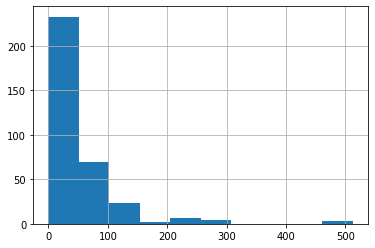

In [17]:
survived = df[df.Survived == 1]
survived["Fare"].hist()

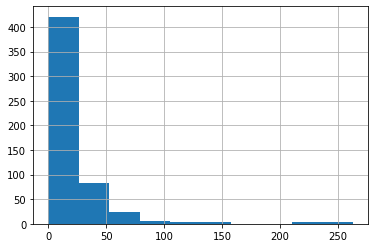

In [18]:
died = df[df.Survived == 0]
died["Fare"].hist()

In [10]:
# Segment data to better inspect it
df["FareFrames"] = pd.cut(df["Fare"], 5)
df["FareFrames"].unique()

[(-0.512, 102.466], (204.932, 307.398], (102.466, 204.932], (409.863, 512.329]]
Categories (4, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (409.863, 512.329]]

In [24]:
# The poor are dying
df.groupby('FareFrames')[['Survived']].mean()

,Survived
FareFrames,
"(-0.512, 102.466]",0.361575
"(102.466, 204.932]",0.757576
"(204.932, 307.398]",0.647059
"(307.398, 409.863]",NaN
"(409.863, 512.329]",1.000000


### Data Wrangling

In [21]:
# Fill missing values for 'Age' with mean
df = df.fillna(value={'Age': df['Age'].mean()}) # value can take a dict to specify column

In [22]:
# Verify missing values are filled
df['Age'].isna().sum()

0

### Logistic Regression

In [23]:
# Build model with all available numerical input
X = df[["Age", "Pclass", "SibSp", "Parch", "Fare"]] # Dataframe == table == matrix / uppercase for matrices
y = df["Survived"] # Series == columns == vector / lowercase for vectors

In [24]:
X.shape, y.shape

((891, 5), (891,))

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(C=1e5) # initialize the model
model.fit(X, y) # train the model (find the best parameter values for this data)b

LogisticRegression(C=100000.0)

In [27]:
# calculate a metric (accuracy == % of correct predictions)
model.score(X, y)

0.7059483726150393

In [28]:
# inspect model parameters
model.coef_, model.intercept_

(array([[-0.03833041, -0.93495535, -0.23901722,  0.21803628,  0.00460819]]),
 array([2.66508144]))

In [29]:
# make predictions
passengers = [[25.0, 3, 1, 2, 10], [10.0, 2, 1, 2, 200], [99.0, 1, 1, 0, 400]]
model.predict(passengers)

array([0, 1, 0])

In [30]:
# probabilities (actual values of the sigmoid function)
# left col: p(dead)
# right col: p(alive)
model.predict_proba(passengers)

array([[0.7015956 , 0.2984044 ],
       [0.17791173, 0.82208827],
       [0.61309127, 0.38690873]])

### Improvements

In [25]:
# 'Sex' seems like a promising column
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
# Transform strs to ints
df = df.replace("female", 1)
df = df.replace("male", 0)

In [33]:
df["Sex"].unique()

array([0, 1])

In [34]:
# Run model with new feature
X = df[["Age", "Pclass", "SibSp", "Parch", "Fare", "Sex"]]
y = df["Survived"]

model = LogisticRegression(C=1e5)
model.fit(X, y)
model.score(X, y)

0.7934904601571269

Awesome.

# More Improvement?

In [26]:
# Embarked
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957
